# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- SHIB Burn Rate Drop More Than 88%, Shiba Inu Price To Lose Its Bullish Momentum.  The post SHIB Burn Rate Drop More Than 88%, Shiba Inu Price To Lose Its Bullish Momentum appeared first on Coinpedia Fintech NewsThe popular meme currency, Shiba Inu (shib), has suddenly gained popularity. Though its competitor Dogecoin is ahead of Shiba Inu in terms of market capitalization, SHIB is much ahead in terms of development. On the other hand, Shiba Inu has also been the victim of volatility as the currency has been declining. At the time &#8230; ... [| Skaityti daugiau](https://coinpedia.org/altcoin/shib-burn-rate-drop-more-than-88-shiba-inu-price-to-lose-its-bullish-momentum/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Australia to end mandatory Covid isolation.  After enforcing some of world's toughest rules, Australia will no longer force people to stay at home. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-australia-63084976) 

### Kainų kaita pandemijos metu

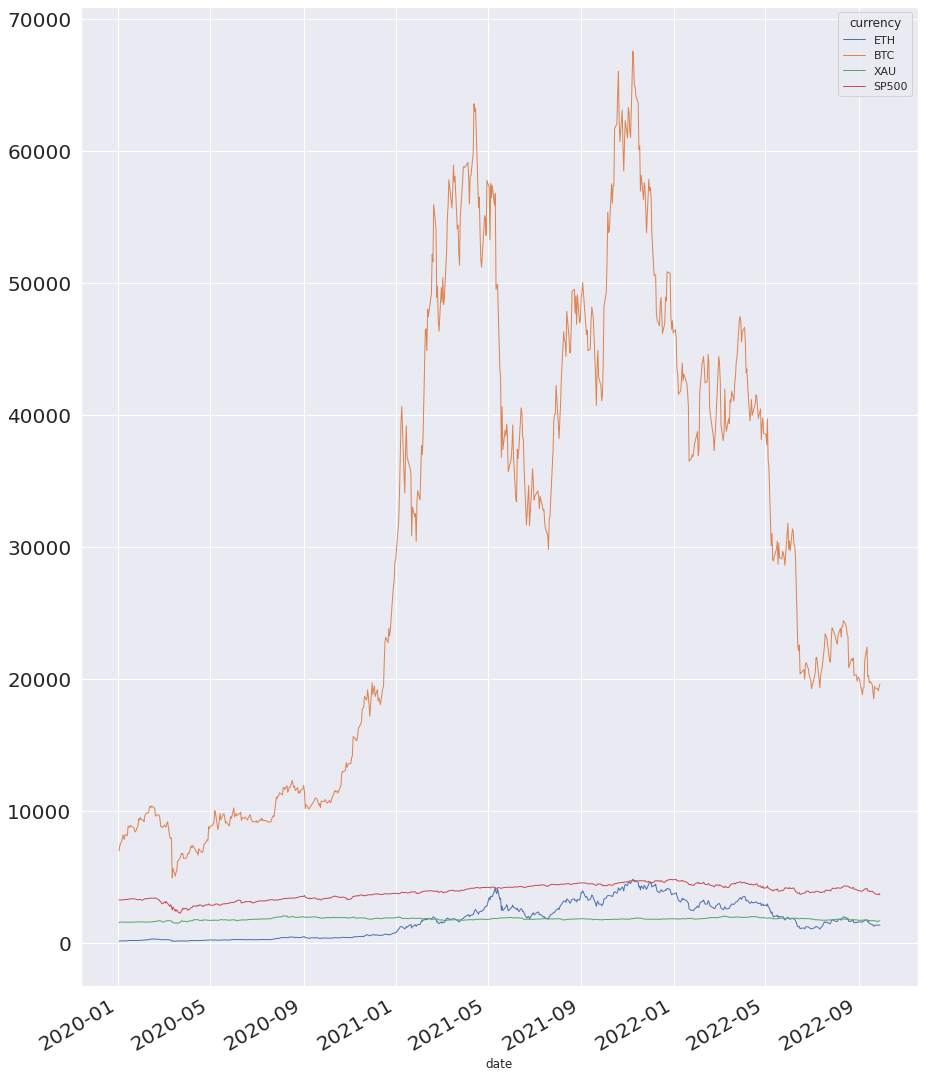

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.898307,0.250820,0.914363
BTC,0.898307,1.000000,0.220472,0.844055
XAU,0.250820,0.220472,1.000000,0.357743
SP500,0.914363,0.844055,0.357743,1.000000


In [8]:
#hide ### Koreliacijos matrica.

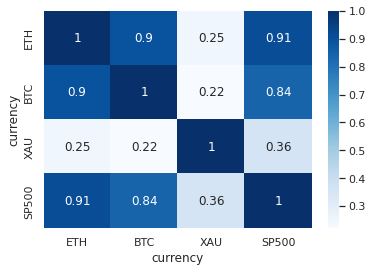

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')